# Lab 4: Fuzzy Foundations & Visualisation

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

## Exercise 1: Crisp vs. Fuzzy Tallness

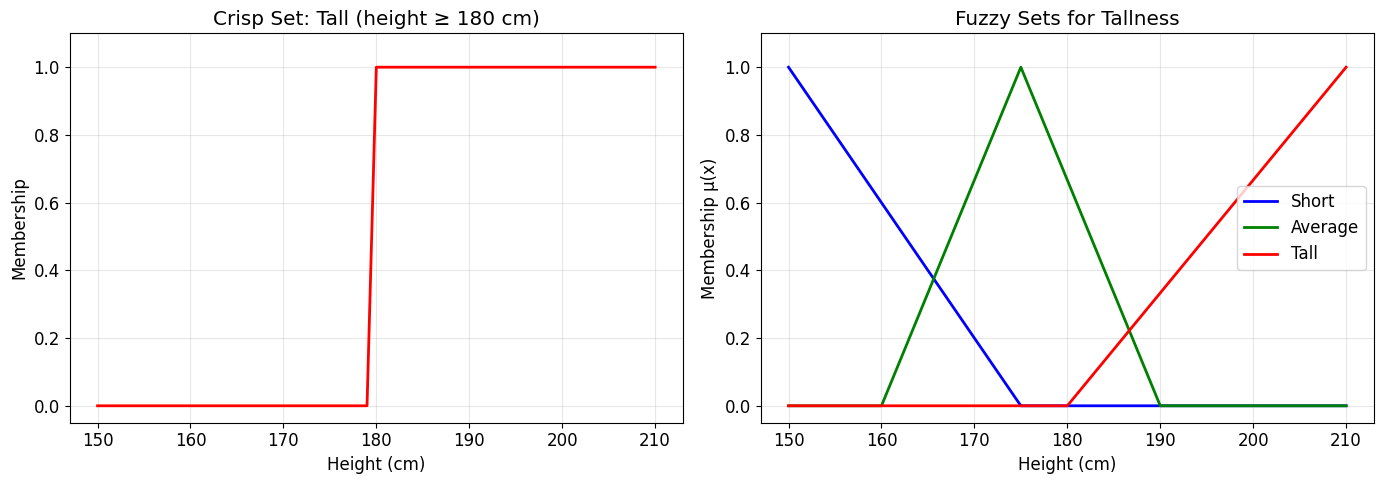

A person who is 184 cm tall:
 μ_average(184) = 0.40
 μ_tall(184) = 0.13
 → Partial membership in MULTIPLE sets simultaneously.


In [4]:
# Universe of discourse: height in cm
x_height = np.arange(150, 211, 1)

# --- Crisp set: tall if height >= 180 ---
crisp_tall = np.where(x_height >= 180, 1.0, 0.0)

# --- Fuzzy sets ---
short = fuzz.trimf(x_height, [150, 150, 175])
# TODO: create here the "average" and "tall" sets
average = fuzz.trimf(x_height, [160, 175, 190])
tall = fuzz.trimf(x_height, [180, 210, 210])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Crisp
ax1.plot(x_height, crisp_tall, 'r-', linewidth=2)
ax1.set_title('Crisp Set: Tall (height ≥ 180 cm)')
ax1.set_xlabel('Height (cm)')
ax1.set_ylabel('Membership')
ax1.set_ylim(-0.05, 1.1)

# Fuzzy
ax2.plot(x_height, short, 'b-', linewidth=2, label='Short')
ax2.plot(x_height, average, 'g-', linewidth=2, label='Average')
ax2.plot(x_height, tall, 'r-', linewidth=2, label='Tall')
ax2.set_title('Fuzzy Sets for Tallness')
ax2.set_xlabel('Height (cm)')
ax2.set_ylabel('Membership μ(x)')
ax2.set_ylim(-0.05, 1.1)
ax2.legend()
plt.tight_layout()
plt.show()

# Demonstrate partial membership
height = 184
mu_avg = fuzz.interp_membership(x_height, average, height)
# TODO: compute here the membership value for "tall"
mu_tall = fuzz.interp_membership(x_height, tall, height)

print(f"A person who is {height} cm tall:")
print(f" μ_average({height}) = {mu_avg:.2f}")
print(f" μ_tall({height}) = {mu_tall:.2f}")
print(f" → Partial membership in MULTIPLE sets simultaneously.")